In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv('abc_company_dataset.csv')

In [187]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
 9   height    458 non-null    int32  
dtypes: float64(1), int32(1), int64(3), object(5)
memory usage: 34.1+ KB


In [191]:
data.shape

(458, 10)

In [11]:
data.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


In [17]:
#Preprocessing

np.random.seed(42)

data['height'] = np.random.randint(150, 181, size=len(data))

data.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,height
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0,156
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0,169
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN,178
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0,164
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0,160


In [23]:
#1. Determine the distribution of employees across each team and calculate the percentage split relative to the total number of employees. 

team_distribution = data['Team'].value_counts()
team_distribution

team_percentage = (team_distribution / len(data)) * 100
team_percentage

Team
New Orleans Pelicans      4.148472
Memphis Grizzlies         3.930131
Utah Jazz                 3.493450
New York Knicks           3.493450
Milwaukee Bucks           3.493450
Brooklyn Nets             3.275109
Portland Trail Blazers    3.275109
Oklahoma City Thunder     3.275109
Denver Nuggets            3.275109
Washington Wizards        3.275109
Miami Heat                3.275109
Charlotte Hornets         3.275109
Atlanta Hawks             3.275109
San Antonio Spurs         3.275109
Houston Rockets           3.275109
Boston Celtics            3.275109
Indiana Pacers            3.275109
Detroit Pistons           3.275109
Cleveland Cavaliers       3.275109
Chicago Bulls             3.275109
Sacramento Kings          3.275109
Phoenix Suns              3.275109
Los Angeles Lakers        3.275109
Los Angeles Clippers      3.275109
Golden State Warriors     3.275109
Toronto Raptors           3.275109
Philadelphia 76ers        3.275109
Dallas Mavericks          3.275109
Orlando Magic  

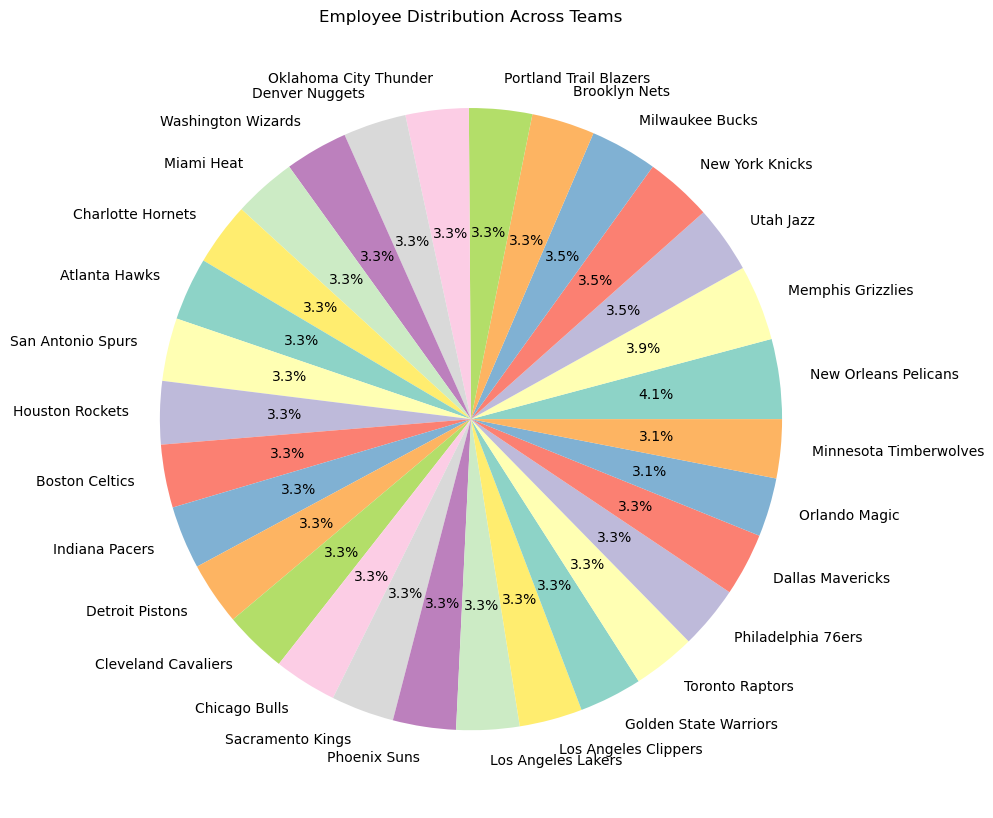

In [39]:
# Plotting the distribution
plt.figure(figsize=(10, 10))
team_distribution.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("Set3", len(team_distribution)))
plt.title('Employee Distribution Across Teams')
plt.ylabel('') 
plt.tight_layout()

In [43]:
#2. Segregate employees based on their positions within the company.

position_distribution = data['Position'].value_counts()
position_distribution

Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64

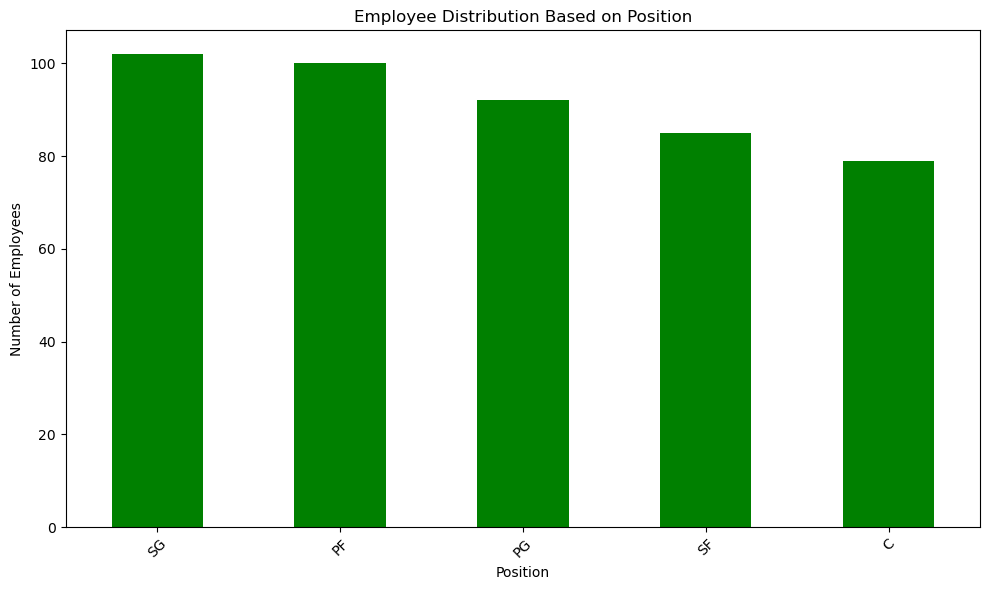

In [49]:
# Plotting the position distribution
plt.figure(figsize=(10, 6))
position_distribution.plot(kind='bar', color='green')
plt.title('Employee Distribution Based on Position')
plt.xlabel('Position')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.tight_layout()

In [91]:
#3. Identify the predominant age group among employees.

decades = [15,20,25,30,35,40,45,50]
age_groups = pd.cut(data['Age'], bins=decades, right=False)
age_groups

age_group_counts = age_groups.value_counts(sort=False)
age_group_counts

Age
[15, 20)      2
[20, 25)    152
[25, 30)    182
[30, 35)     90
[35, 40)     29
[40, 45)      3
[45, 50)      0
Name: count, dtype: int64

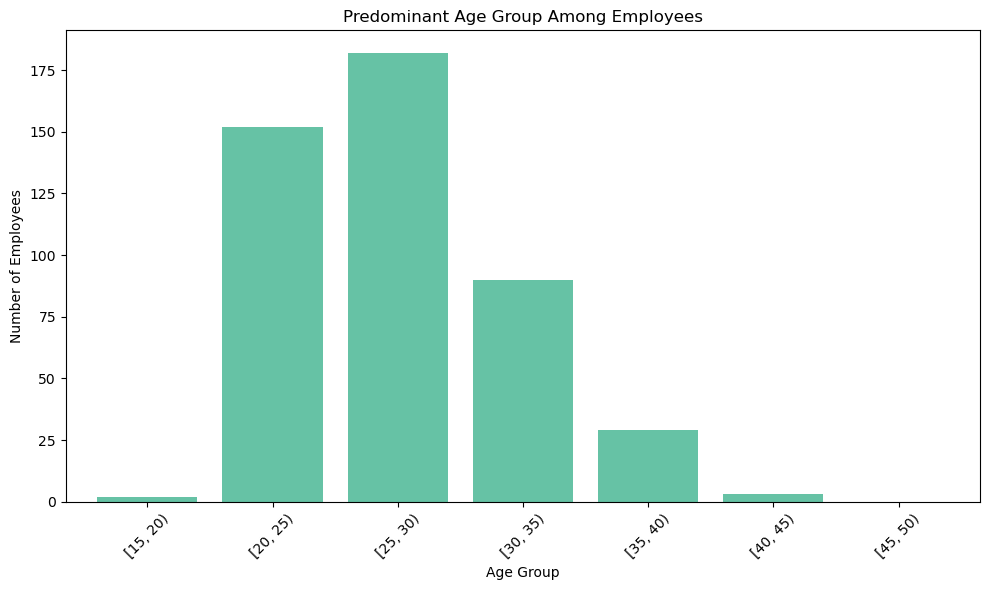

In [93]:
# Plotting the age group distribution
plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar',stacked= True, width=0.8, colormap='Set2')
plt.title('Predominant Age Group Among Employees')
plt.xlabel('Age Group')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.tight_layout()

In [117]:
#4. Discover which team and position have the highest salary expenditure.

team_salary = data.groupby('Team')['Salary'].sum()
team_salary

Team
Atlanta Hawks              72902950.0
Boston Celtics             58541068.0
Brooklyn Nets              52528475.0
Charlotte Hornets          78340920.0
Chicago Bulls              86783378.0
Cleveland Cavaliers       106988689.0
Dallas Mavericks           71198732.0
Denver Nuggets             60121930.0
Detroit Pistons            67168263.0
Golden State Warriors      88868997.0
Houston Rockets            75283021.0
Indiana Pacers             66751826.0
Los Angeles Clippers       94854640.0
Los Angeles Lakers         71770431.0
Memphis Grizzlies          76550880.0
Miami Heat                 82515673.0
Milwaukee Bucks            69603517.0
Minnesota Timberwolves     59709697.0
New Orleans Pelicans       82750774.0
New York Knicks            73303898.0
Oklahoma City Thunder      93765298.0
Orlando Magic              60161470.0
Philadelphia 76ers         30992894.0
Phoenix Suns               63445135.0
Portland Trail Blazers     48301818.0
Sacramento Kings           71683666.0
San Ant

In [119]:
highest_team_salary = team_salary.idxmax()
highest_team_salary

'Cleveland Cavaliers'

In [121]:
highest_team_salary_value = team_salary.max()
highest_team_salary_value

106988689.0

In [123]:
position_salary = data.groupby('Position')['Salary'].sum()
position_salary

Position
C     466377332.0
PF    442560850.0
PG    446848971.0
SF    408020976.0
SG    396976258.0
Name: Salary, dtype: float64

In [125]:
highest_position_salary = position_salary.idxmax()
highest_position_salary

'C'

In [127]:
highest_position_salary_value = position_salary.max()
highest_position_salary_value

466377332.0

[Text(0, 0, 'C'),
 Text(1, 0, 'PF'),
 Text(2, 0, 'PG'),
 Text(3, 0, 'SF'),
 Text(4, 0, 'SG')]

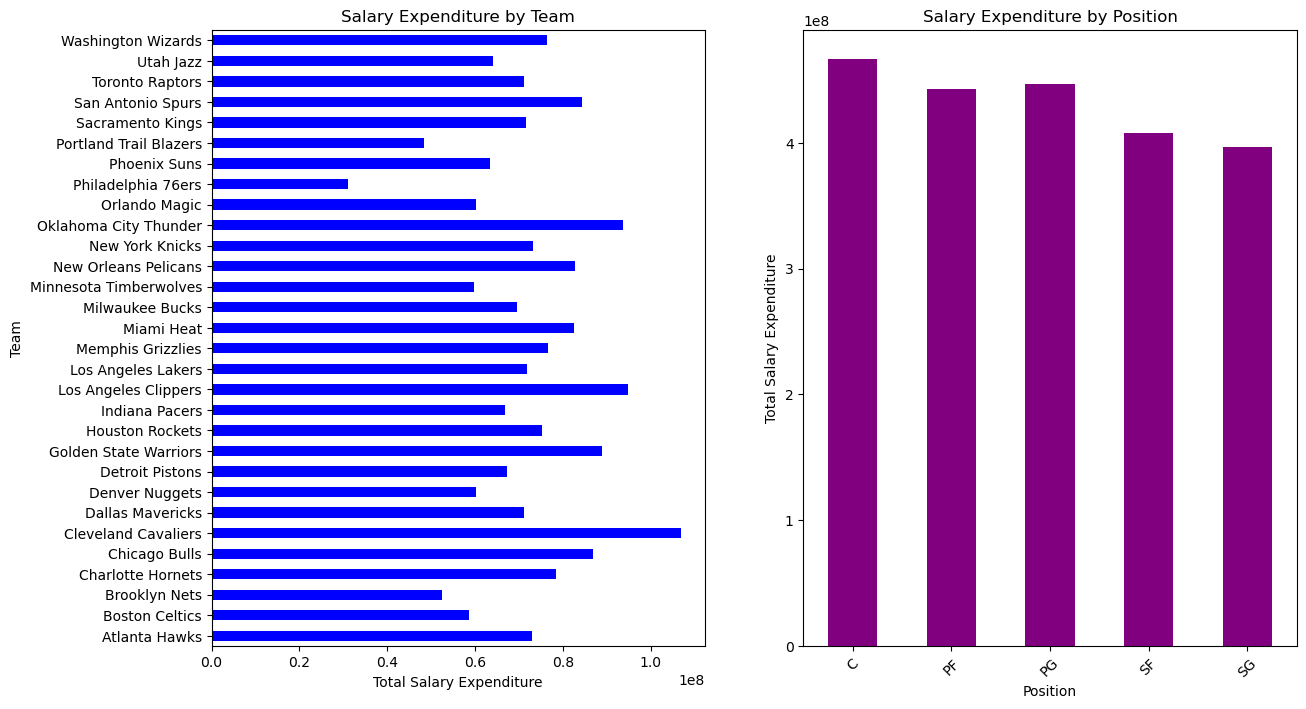

In [153]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))

team_salary.plot(kind='barh', color='blue', ax=ax1)
ax1.set_title('Salary Expenditure by Team')
ax1.set_xlabel('Total Salary Expenditure')
ax1.set_ylabel('Team')
ax1.set_yticklabels(team_salary.index, rotation=0)


position_salary.plot(kind='bar', color='purple', ax=ax2)
ax2.set_title('Salary Expenditure by Position')
ax2.set_xlabel('Position')
ax2.set_ylabel('Total Salary Expenditure')
ax2.set_xticklabels(position_salary.index, rotation=45)

In [159]:
#5. Investigate if there's any correlation between age and salary, and represent it visually.

correlation = data['Age'].corr(data['Salary'])
correlation

0.21400941226570971

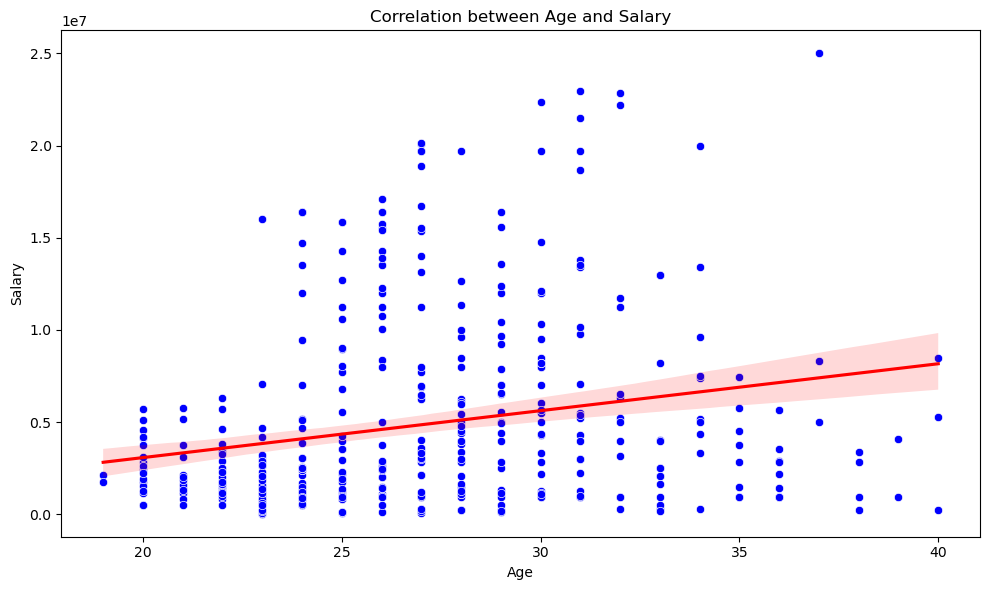

In [181]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Salary', data=data, color='blue')
sns.regplot(x='Age', y='Salary', data=data, scatter=False, color='red')
plt.title('Correlation between Age and Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.tight_layout()

In [185]:
insights = {'team_distribution': team_percentage,
    'age_group_counts': age_group_counts,
    'highest_team_salary': highest_team_salary,
    'highest_position_salary': highest_position_salary,
    'correlation': correlation}

insights

{'team_distribution': Team
 New Orleans Pelicans      4.148472
 Memphis Grizzlies         3.930131
 Utah Jazz                 3.493450
 New York Knicks           3.493450
 Milwaukee Bucks           3.493450
 Brooklyn Nets             3.275109
 Portland Trail Blazers    3.275109
 Oklahoma City Thunder     3.275109
 Denver Nuggets            3.275109
 Washington Wizards        3.275109
 Miami Heat                3.275109
 Charlotte Hornets         3.275109
 Atlanta Hawks             3.275109
 San Antonio Spurs         3.275109
 Houston Rockets           3.275109
 Boston Celtics            3.275109
 Indiana Pacers            3.275109
 Detroit Pistons           3.275109
 Cleveland Cavaliers       3.275109
 Chicago Bulls             3.275109
 Sacramento Kings          3.275109
 Phoenix Suns              3.275109
 Los Angeles Lakers        3.275109
 Los Angeles Clippers      3.275109
 Golden State Warriors     3.275109
 Toronto Raptors           3.275109
 Philadelphia 76ers        3.275109
 